# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.
merge_data["Mouse ID"].nunique()

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = merge_data["Mouse ID"][merge_data[["Mouse ID", "Timepoint"]].duplicated()].unique()
duplicate_ids

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merge_data[merge_data["Mouse ID"].isin(duplicate_ids)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data[~merge_data["Mouse ID"].isin(duplicate_ids)]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

group_data = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": group_data.mean(), 
    "Median Tumor Volume": group_data.median(), 
    "Tumor Volume Variance": group_data.var(), 
    "Tumor Volume Std. Dev.": group_data.std(),
    "Tumor Volume Std. Err.": group_data.apply(st.sem)
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean="mean", median="median", variance="var", std="std", sem=st.sem)

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

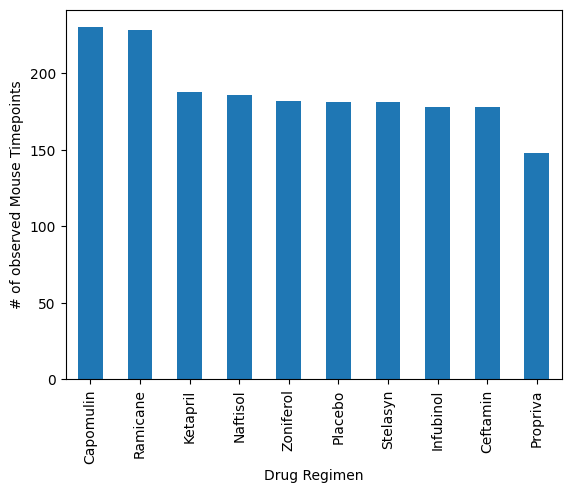

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# y="# of observed Mouse Timepoints"
# x="Drug Regimen"
clean_data["Drug Regimen"]\
    .value_counts()\
    .reset_index()\
    .plot(kind="bar", x="Drug Regimen", y="count", legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

Text(0, 0.5, '# of observed Mouse Timepoints')

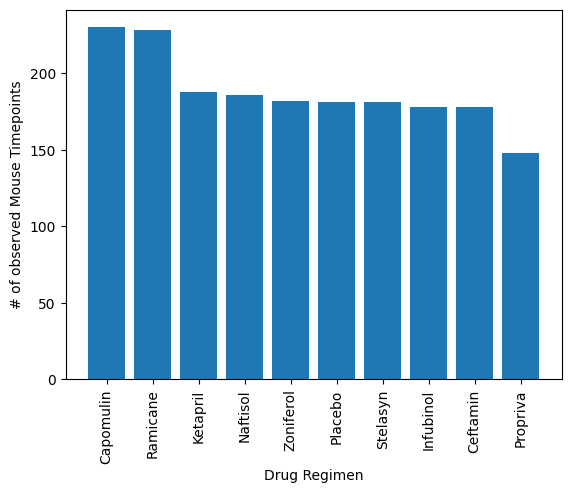

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_count = clean_data["Drug Regimen"]\
    .value_counts()\
    .reset_index()
#row_count
plt.bar(row_count["Drug Regimen"], row_count["count"])
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

<Axes: ylabel='count'>

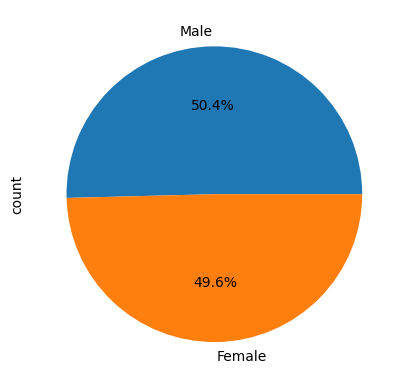

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_data[["Mouse ID", "Sex"]][~clean_data[["Mouse ID", "Sex"]].duplicated()]
#gender_data
# Make the pie chart
gender_data["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'count')

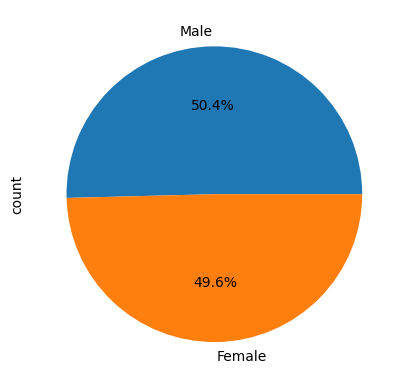

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data2 = gender_data["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_data2, labels=gender_data2.index, autopct="%1.1f%%")
plt.ylabel("count")

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_data_last = clean_data.groupby(["Mouse ID", "Drug Regimen"])\
    .apply(lambda x: x.iloc[-1])\
    .reset_index(drop=True)
# clean_data_last.head(50)

# clean_data_last
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_data_merge = pd.merge(
    clean_data,
    clean_data_last, 
    on=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Metastatic Sites"], 
    suffixes=("", " Final")
)
clean_data_merge.head(10)

C:\Users\Sibal_1w46aws\AppData\Local\Temp\ipykernel_16952\2266999567.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[-1])\


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Final,Tumor Volume (mm3) Final
0,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
1,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
2,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126
3,k403,Ramicane,Male,21,16,25,33.464577,1,45,22.050126
4,k403,Ramicane,Male,21,16,30,31.099498,1,45,22.050126
5,k403,Ramicane,Male,21,16,35,26.546993,1,45,22.050126
6,k403,Ramicane,Male,21,16,40,24.365505,1,45,22.050126
7,k403,Ramicane,Male,21,16,45,22.050126,1,45,22.050126
8,s185,Capomulin,Female,3,17,30,32.959671,1,45,23.343598
9,s185,Capomulin,Female,3,17,35,28.328531,1,45,23.343598


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in promising_drugs:
    df = clean_data_merge[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3) Final"]].drop_duplicates(keep='last')
    final_tumor_volume = df[df["Drug Regimen"] == drug][["Drug Regimen", "Tumor Volume (mm3) Final"]]
    # print(final_tumor_volume)
    tumor_volume.append(final_tumor_volume)
tumor_volume

    # add subset
iqr = {}
for serie in tumor_volume:
    q1 = serie["Tumor Volume (mm3) Final"].quantile(0.25)
    q3 = serie["Tumor Volume (mm3) Final"].quantile(0.75)
    drug_name = set(serie["Drug Regimen"]).pop()
    iqr[drug_name] = [float(q1), float(q3)]

# iqr
    

    # Determine outliers using upper and lower bounds
outliers = {}
for serie in tumor_volume:
    outlier = []
    drug_name = set(serie["Drug Regimen"]).pop()
    first_quantile = iqr[drug_name][0]
    third_quantile = iqr[drug_name][1]
    iqr_range = third_quantile - first_quantile

    for value in serie["Tumor Volume (mm3) Final"]:
        if value > (third_quantile + 1.5 * iqr_range) or value < (first_quantile - 1.5 * iqr_range):
            outlier.append(value)
    outliers[drug_name] = outlier

outliers

KeyError: '11    Capomulin\nName: Drug Regimen, dtype: object'

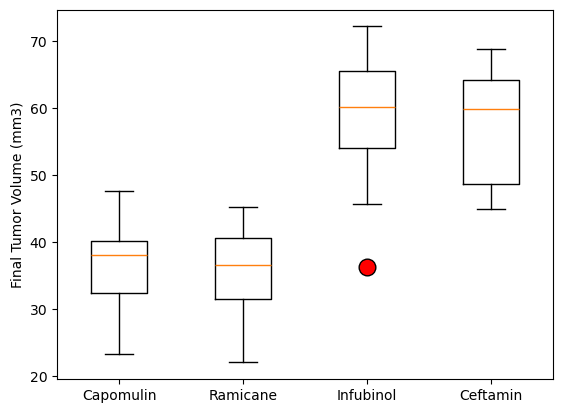

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

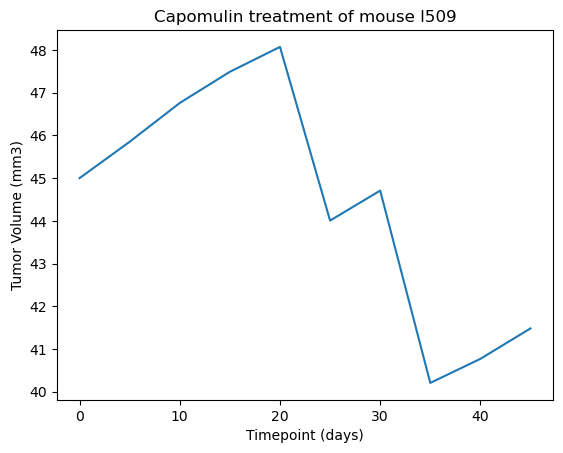

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


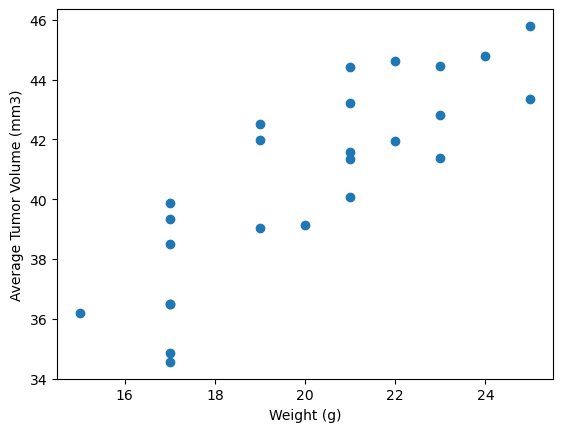

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


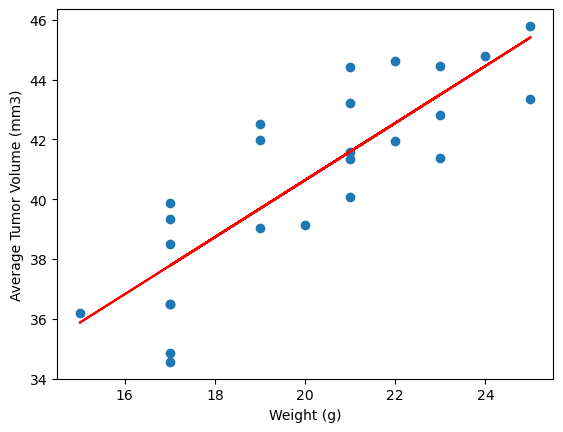

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
